In [1]:
import yfinance as yf
import pandas as pd

import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots

import datetime as dt
from datetime import timedelta

from matplotlib import pyplot as plt

In [2]:
# parameters for API call
start = start = dt.datetime(2011,12,1)
end = dt.datetime(2020,2,29)
ticker = 'NG=F' # 

In [3]:
# API request
df = yf.download(ticker,start,end)

[*********************100%***********************]  1 of 1 completed


In [4]:
# rename adjusted close column
df = df.rename(columns={"Adj Close":'Adj_Close'})
df

,Open,High,Low,Close,Adj_Close,Volume
Date,,,,,,
2011-12-01,3.575,3.689,3.541,3.648,3.648,175649
2011-12-02,3.644,3.663,3.568,3.584,3.584,84298
2011-12-05,3.570,3.572,3.444,3.461,3.461,114253
2011-12-06,3.463,3.507,3.405,3.487,3.487,122829
2011-12-07,3.497,3.504,3.409,3.421,3.421,138854
...,...,...,...,...,...,...
2020-02-24,1.884,1.884,1.824,1.827,1.827,75204
2020-02-25,1.836,1.862,1.819,1.847,1.847,70528
2020-02-26,1.848,1.880,1.810,1.821,1.821,163415


In [5]:
# https://stackoverflow.com/questions/40256338/calculating-average-true-range-atr-on-ohlc-data-with-python
# fifth answer
days = 5
# calculate Average True Range over length of dataset
ATR = pd.concat([df.High.sub(df.Low), df.High.sub(df.Adj_Close.shift()), df.Low.sub(df.Adj_Close.shift())], axis=1).max(1).ewm(span=days).mean()

In [6]:
ATR = pd.DataFrame(ATR)
ATR

,0
Date,
2011-12-01,0.148000
2011-12-02,0.116200
2011-12-05,0.121789
2011-12-06,0.113569
2011-12-07,0.106441
...,...
2020-02-24,0.072027
2020-02-25,0.062352
2020-02-26,0.064901


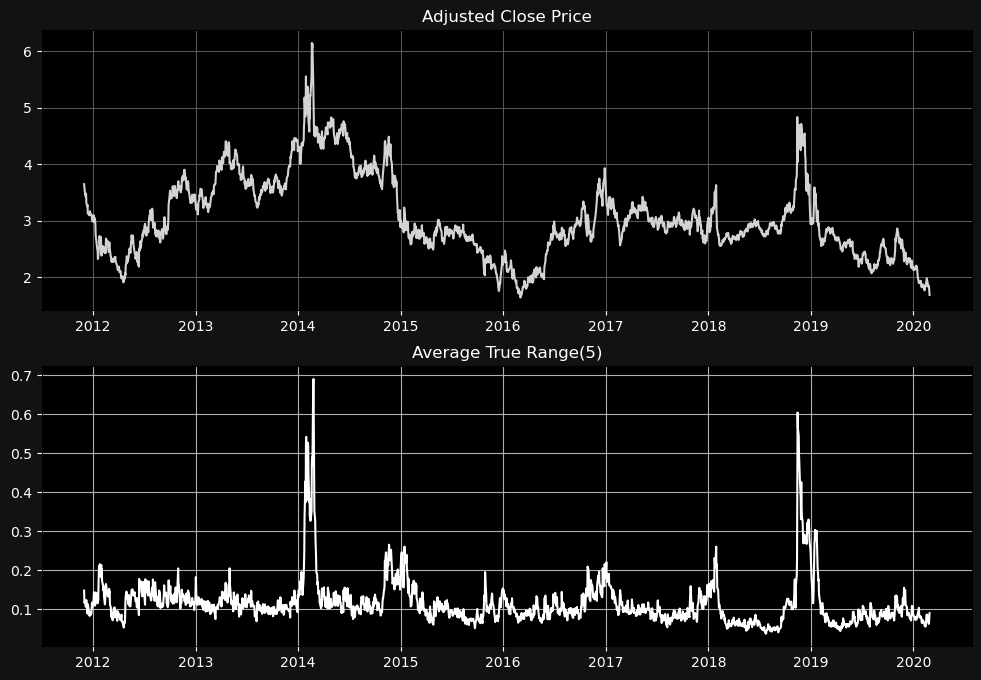

In [7]:
####### plot NG price and ATR over length of timeframe ########

plt.figure(figsize=(12,8))

## natural gas futures prices plot
ax1 = plt.subplot(211)
ax1.plot(df.index, df['Adj_Close'], color='lightgray')
ax1.set_title('Adjusted Close Price', color ="white")

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')


# 14 day ATR plot
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(df.index, ATR, color='white')



ax2.set_title(f'Average True Range({days})', color='white')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')


##################

plt.show()

In [8]:
# merge ATR data to price dataframe
merged_df = pd.concat([df, ATR], axis=1)


In [9]:
# rename 0 column to 'ATR'
merged_df.rename(columns={0:'ATR'}, inplace=True)

In [10]:
# final merged df
merged_df

,Open,High,Low,Close,Adj_Close,Volume,ATR
Date,,,,,,,
2011-12-01,3.575,3.689,3.541,3.648,3.648,175649,0.148000
2011-12-02,3.644,3.663,3.568,3.584,3.584,84298,0.116200
2011-12-05,3.570,3.572,3.444,3.461,3.461,114253,0.121789
2011-12-06,3.463,3.507,3.405,3.487,3.487,122829,0.113569
2011-12-07,3.497,3.504,3.409,3.421,3.421,138854,0.106441
...,...,...,...,...,...,...,...
2020-02-24,1.884,1.884,1.824,1.827,1.827,75204,0.072027
2020-02-25,1.836,1.862,1.819,1.847,1.847,70528,0.062352
2020-02-26,1.848,1.880,1.810,1.821,1.821,163415,0.064901


In [11]:
# making index a 'Date' column
    # simplifies filtering by date in following steps
merged_df = merged_df.reset_index()


In [12]:
merged_df

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
0,2011-12-01,3.575,3.689,3.541,3.648,3.648,175649,0.148000
1,2011-12-02,3.644,3.663,3.568,3.584,3.584,84298,0.116200
2,2011-12-05,3.570,3.572,3.444,3.461,3.461,114253,0.121789
3,2011-12-06,3.463,3.507,3.405,3.487,3.487,122829,0.113569
4,2011-12-07,3.497,3.504,3.409,3.421,3.421,138854,0.106441
...,...,...,...,...,...,...,...,...
2066,2020-02-24,1.884,1.884,1.824,1.827,1.827,75204,0.072027
2067,2020-02-25,1.836,1.862,1.819,1.847,1.847,70528,0.062352
2068,2020-02-26,1.848,1.880,1.810,1.821,1.821,163415,0.064901
2069,2020-02-27,1.828,1.831,1.719,1.752,1.752,276100,0.080601


In [13]:
# build list of years in timeframe
years = [year for year in range(2010,2020)]
years

[2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019]

In [14]:
# combine all winter data into single dataframe
filtered_df = pd.DataFrame()

for year in years:
    winter_df = merged_df.loc[(merged_df['Date'] >= f'{year}-12-01') & (merged_df['Date'] <f'{year+1}-03-01')]
    filtered_df = pd.concat([filtered_df, winter_df])

In [15]:
filtered_df

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
0,2011-12-01,3.575,3.689,3.541,3.648,3.648,175649,0.148000
1,2011-12-02,3.644,3.663,3.568,3.584,3.584,84298,0.116200
2,2011-12-05,3.570,3.572,3.444,3.461,3.461,114253,0.121789
3,2011-12-06,3.463,3.507,3.405,3.487,3.487,122829,0.113569
4,2011-12-07,3.497,3.504,3.409,3.421,3.421,138854,0.106441
...,...,...,...,...,...,...,...,...
2066,2020-02-24,1.884,1.884,1.824,1.827,1.827,75204,0.072027
2067,2020-02-25,1.836,1.862,1.819,1.847,1.847,70528,0.062352
2068,2020-02-26,1.848,1.880,1.810,1.821,1.821,163415,0.064901
2069,2020-02-27,1.828,1.831,1.719,1.752,1.752,276100,0.080601


In [16]:
# export dataframe above in CSV file
# filtered_df.to_csv('winter_NG_data.csv', index=False)


In [17]:
######################## build sub-datasets for each year ############################

In [18]:
############ 2011 - 2012 #############

In [19]:
# price and ATR data for 2011-12-01 - 2012-02-29
winter_11_12 = merged_df.loc[(merged_df['Date'] >= '2011-12-01') & (merged_df['Date'] < '2012-03-01')]
winter_11_12

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
0,2011-12-01,3.575,3.689,3.541,3.648,3.648,175649,0.148000
1,2011-12-02,3.644,3.663,3.568,3.584,3.584,84298,0.116200
2,2011-12-05,3.570,3.572,3.444,3.461,3.461,114253,0.121789
3,2011-12-06,3.463,3.507,3.405,3.487,3.487,122829,0.113569
4,2011-12-07,3.497,3.504,3.409,3.421,3.421,138854,0.106441
...,...,...,...,...,...,...,...,...
56,2012-02-23,2.664,2.695,2.565,2.621,2.621,110200,0.136870
57,2012-02-24,2.613,2.635,2.512,2.550,2.550,79005,0.132247
58,2012-02-27,2.523,2.589,2.435,2.446,2.446,149955,0.139498
59,2012-02-28,2.598,2.624,2.511,2.519,2.519,122327,0.152332


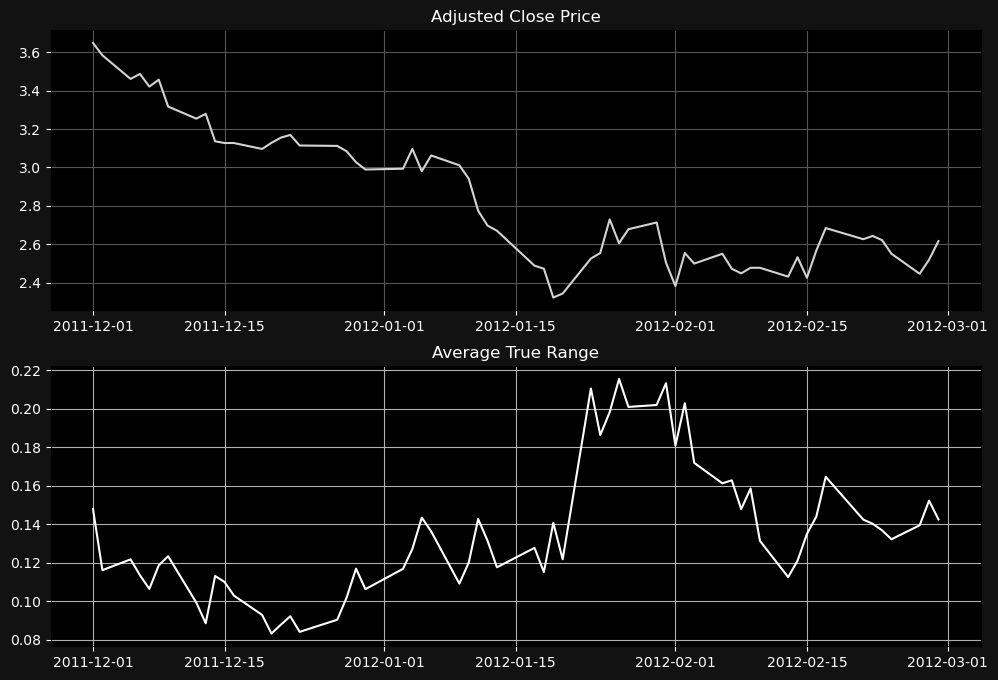

In [20]:
# plot price and ATR data for 12/01/2010 - 3/28/2011


plt.figure(figsize=(12,8))

## natural gas futures prices plot
ax1 = plt.subplot(211)
ax1.plot(winter_11_12['Date'], winter_11_12['Adj_Close'], color='lightgray')
ax1.set_title('Adjusted Close Price', color ="white")

ax1.grid(True, color='#555555')
ax1.set_axisbelow(True)
ax1.set_facecolor('black')
ax1.figure.set_facecolor('#121212')
ax1.tick_params(axis='x', colors='white')
ax1.tick_params(axis='y', colors='white')


# 14 day ATR plot
ax2 = plt.subplot(212, sharex=ax1)
ax2.plot(winter_11_12['Date'], winter_11_12['ATR'], color='white')



ax2.set_title('Average True Range', color='white')
ax2.grid(True)
ax2.set_axisbelow(True)
ax2.set_facecolor('black')
ax2.tick_params(axis='x', colors='white')
ax2.tick_params(axis='y', colors='white')


##################

plt.show()

In [21]:
# change 'Date' to index
winter_11_12 = winter_11_12.set_index('Date')
winter_11_12

,Open,High,Low,Close,Adj_Close,Volume,ATR
Date,,,,,,,
2011-12-01,3.575,3.689,3.541,3.648,3.648,175649,0.148000
2011-12-02,3.644,3.663,3.568,3.584,3.584,84298,0.116200
2011-12-05,3.570,3.572,3.444,3.461,3.461,114253,0.121789
2011-12-06,3.463,3.507,3.405,3.487,3.487,122829,0.113569
2011-12-07,3.497,3.504,3.409,3.421,3.421,138854,0.106441
...,...,...,...,...,...,...,...
2012-02-23,2.664,2.695,2.565,2.621,2.621,110200,0.136870
2012-02-24,2.613,2.635,2.512,2.550,2.550,79005,0.132247
2012-02-27,2.523,2.589,2.435,2.446,2.446,149955,0.139498


In [22]:
# export JSON file
winter_11_12.to_json(r'C:\Users\13148\Desktop\Group-Project-3\Price_data\ATR_11_12.json')

In [23]:
############ 2012 - 2013 #############

In [24]:
# filter price/ATR data
winter_12_13 = merged_df.loc[(merged_df['Date'] >= '2012-12-01') & (merged_df['Date'] < '2013-03-01')]
winter_12_13

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
251,2012-12-03,3.553,3.643,3.526,3.591,3.591,135669,0.131007
252,2012-12-04,3.611,3.611,3.525,3.539,3.539,103428,0.116005
253,2012-12-05,3.547,3.719,3.507,3.700,3.700,148134,0.148003
254,2012-12-06,3.690,3.748,3.614,3.666,3.666,183559,0.143335
255,2012-12-07,3.640,3.684,3.539,3.551,3.551,164022,0.143890
256,2012-12-10,3.519,3.520,3.415,3.460,3.460,189998,0.130927
257,2012-12-11,3.426,3.494,3.391,3.412,3.412,181126,0.121618
258,2012-12-12,3.423,3.447,3.366,3.382,3.382,187101,0.108079
259,2012-12-13,3.395,3.407,3.293,3.347,3.347,228082,0.110052
260,2012-12-14,3.339,3.363,3.261,3.314,3.314,147815,0.107368


In [25]:
# change 'Date' to index
winter_12_13 = winter_12_13.set_index('Date')
winter_12_13

,Open,High,Low,Close,Adj_Close,Volume,ATR
Date,,,,,,,
2012-12-03,3.553,3.643,3.526,3.591,3.591,135669,0.131007
2012-12-04,3.611,3.611,3.525,3.539,3.539,103428,0.116005
2012-12-05,3.547,3.719,3.507,3.700,3.700,148134,0.148003
2012-12-06,3.690,3.748,3.614,3.666,3.666,183559,0.143335
2012-12-07,3.640,3.684,3.539,3.551,3.551,164022,0.143890
2012-12-10,3.519,3.520,3.415,3.460,3.460,189998,0.130927
2012-12-11,3.426,3.494,3.391,3.412,3.412,181126,0.121618
2012-12-12,3.423,3.447,3.366,3.382,3.382,187101,0.108079
2012-12-13,3.395,3.407,3.293,3.347,3.347,228082,0.110052


In [26]:
# export JSON file
winter_12_13.to_json(r'C:\Users\13148\Desktop\Group-Project-3\Price_data\ATR_12_13.json')

In [27]:
############ 2013 - 2014 #############

In [28]:
# filter price/ATR data
winter_13_14 = merged_df.loc[(merged_df['Date'] >= '2013-12-01') & (merged_df['Date'] < '2014-03-01')]
winter_13_14

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
502,2013-12-02,3.911,3.993,3.897,3.988,3.988,129861,0.095934
503,2013-12-03,3.975,4.017,3.945,3.976,3.976,130050,0.087956
504,2013-12-04,3.980,4.013,3.953,3.960,3.960,104509,0.078637
505,2013-12-05,3.965,4.152,3.951,4.132,4.132,247404,0.119425
506,2013-12-06,4.144,4.199,4.103,4.114,4.114,218988,0.111617
...,...,...,...,...,...,...,...,...
558,2014-02-24,6.300,6.493,5.380,5.445,5.445,116688,0.683579
559,2014-02-25,5.464,5.492,4.788,5.096,5.096,81451,0.690386
560,2014-02-26,4.957,5.005,4.660,4.855,4.855,166416,0.575258
561,2014-02-27,4.522,4.567,4.441,4.511,4.511,133093,0.425505


In [29]:
# change 'Date' to index
winter_13_14 = winter_13_14.set_index('Date')
#winter_13_14

In [30]:
# export JSON file
winter_13_14.to_json(r'C:\Users\13148\Desktop\Group-Project-3\Price_data\ATR_13_14.json')

In [31]:
############ 2014 - 2015 #############

In [32]:
# filter price/ATR data
winter_14_15 = merged_df.loc[(merged_df['Date'] >= '2014-12-01') & (merged_df['Date'] < '2015-03-01')]
winter_14_15

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
753,2014-12-01,3.975,4.041,3.928,4.007,4.007,181558,0.205936
754,2014-12-02,4.023,4.026,3.856,3.874,3.874,144382,0.193957
755,2014-12-03,3.863,3.866,3.757,3.805,3.805,131446,0.165638
756,2014-12-04,3.787,3.808,3.638,3.649,3.649,143648,0.167092
757,2014-12-05,3.676,3.824,3.664,3.802,3.802,162625,0.169728
...,...,...,...,...,...,...,...,...
809,2015-02-23,2.963,3.039,2.845,2.879,2.879,64988,0.167038
810,2015-02-24,2.869,2.972,2.827,2.902,2.902,79658,0.159692
811,2015-02-25,2.922,2.966,2.852,2.894,2.894,123448,0.144461
812,2015-02-26,2.875,2.888,2.689,2.697,2.697,161322,0.162641


In [33]:
# change 'Date' to index
winter_14_15 = winter_14_15.set_index('Date')
#winter_14_15

In [34]:
# export JSON file
winter_14_15.to_json(r'C:\Users\13148\Desktop\Group-Project-3\Price_data\ATR_14_15.json')

In [35]:
############ 2015 - 2016 #############

In [36]:
# filter price/ATR data
winter_15_16 = merged_df.loc[(merged_df['Date'] >= '2015-12-01') & (merged_df['Date'] < '2016-03-01')]
winter_15_16

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
1005,2015-12-01,2.230,2.259,2.193,2.231,2.231,140269,0.087820
1006,2015-12-02,2.221,2.225,2.151,2.165,2.165,133512,0.083213
1007,2015-12-03,2.174,2.200,2.131,2.181,2.181,143065,0.078475
1008,2015-12-04,2.198,2.211,2.167,2.186,2.186,85242,0.066984
1009,2015-12-07,2.159,2.162,2.060,2.067,2.067,188741,0.078656
...,...,...,...,...,...,...,...,...
1061,2016-02-23,1.832,1.848,1.773,1.782,1.782,54649,0.074730
1062,2016-02-24,1.785,1.808,1.761,1.778,1.778,41977,0.065486
1063,2016-02-25,1.773,1.776,1.682,1.711,1.711,159634,0.074991
1064,2016-02-26,1.786,1.805,1.731,1.791,1.791,115553,0.081327


In [37]:
# change 'Date' to index
winter_15_16 = winter_15_16.set_index('Date')
#winter_15_16

In [38]:
# export JSON file
winter_15_16.to_json(r'C:\Users\13148\Desktop\Group-Project-3\Price_data\ATR_15_16.json')

In [39]:
############ 2016 - 2017 #############

In [40]:
# filter price/ATR data
winter_16_17 = merged_df.loc[(merged_df['Date'] >= '2016-12-01') & (merged_df['Date'] < '2017-03-01')]
winter_16_17

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
1256,2016-12-01,3.348,3.547,3.316,3.505,3.505,210764,0.157905
1257,2016-12-02,3.539,3.568,3.378,3.436,3.436,168563,0.168603
1258,2016-12-05,3.471,3.656,3.450,3.654,3.654,192188,0.185735
1259,2016-12-06,3.600,3.732,3.574,3.635,3.635,225250,0.176490
1260,2016-12-07,3.633,3.748,3.556,3.603,3.603,252203,0.181660
1261,2016-12-08,3.569,3.730,3.503,3.695,3.695,233852,0.196773
1262,2016-12-09,3.710,3.777,3.661,3.746,3.746,206662,0.169849
1263,2016-12-12,3.583,3.601,3.472,3.507,3.507,245756,0.156233
1264,2016-12-13,3.525,3.577,3.448,3.474,3.474,163184,0.147155
1265,2016-12-14,3.477,3.572,3.444,3.540,3.540,140162,0.140770


In [41]:
# change 'Date' to index
winter_16_17 = winter_16_17.set_index('Date')
#winter_16_17

In [42]:
# export JSON file
winter_16_17.to_json(r'C:\Users\13148\Desktop\Group-Project-3\Price_data\ATR_16_17.json')

In [43]:
############ 2017 - 2018 #############

In [44]:
# filter price/ATR data
winter_17_18 = merged_df.loc[(merged_df['Date'] >= '2017-12-01') & (merged_df['Date'] < '2018-03-01')]
winter_17_18

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
1508,2017-12-01,3.032,3.117,3.029,3.061,3.061,213443,0.133891
1509,2017-12-04,3.091,3.127,2.953,2.985,2.985,238226,0.147261
1510,2017-12-05,2.976,2.998,2.875,2.914,2.914,240838,0.139174
1511,2017-12-06,2.910,2.961,2.884,2.922,2.922,178775,0.118449
1512,2017-12-07,2.910,2.922,2.747,2.763,2.763,392520,0.137300
1513,2017-12-08,2.769,2.820,2.757,2.772,2.772,233766,0.112533
1514,2017-12-11,2.831,2.848,2.793,2.828,2.828,196702,0.100355
1515,2017-12-12,2.801,2.844,2.673,2.678,2.678,312864,0.123904
1516,2017-12-13,2.696,2.751,2.656,2.715,2.715,256783,0.114269
1517,2017-12-14,2.704,2.717,2.643,2.684,2.684,205087,0.100846


In [45]:
# change 'Date' to index
winter_17_18 = winter_17_18.set_index('Date')
#winter_17_18

In [46]:
# export JSON file
winter_17_18.to_json(r'C:\Users\13148\Desktop\Group-Project-3\Price_data\ATR_17_18.json')

In [47]:
############ 2018 - 2019 #############

In [48]:
# filter price/ATR data
winter_18_19 = merged_df.loc[(merged_df['Date'] >= '2018-12-01') & (merged_df['Date'] < '2019-03-01')]
winter_18_19

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
1760,2018-12-03,4.527,4.536,4.243,4.339,4.339,190568,0.324090
1761,2018-12-04,4.392,4.574,4.358,4.457,4.457,159868,0.294393
1762,2018-12-06,4.450,4.489,4.271,4.327,4.327,132563,0.268929
1763,2018-12-07,4.348,4.570,4.231,4.488,4.488,182159,0.292286
1764,2018-12-10,4.590,4.666,4.390,4.545,4.545,190053,0.286857
1765,2018-12-11,4.507,4.587,4.348,4.407,4.407,175748,0.270905
1766,2018-12-12,4.363,4.407,4.081,4.136,4.136,198284,0.289270
1767,2018-12-13,4.096,4.307,4.050,4.124,4.124,193403,0.278513
1768,2018-12-14,4.073,4.094,3.787,3.827,3.827,163126,0.288009
1769,2018-12-17,3.620,3.742,3.516,3.528,3.528,142406,0.267339


In [49]:
# change 'Date' to index
winter_18_19 = winter_18_19.set_index('Date')
#winter_18_19

In [50]:
# export JSON file
winter_18_19.to_json(r'C:\Users\13148\Desktop\Group-Project-3\Price_data\ATR_18_19.json')

In [51]:
############ 2019 - 2020 #############

In [52]:
# filter price/ATR data
winter_19_20 = merged_df.loc[(merged_df['Date'] >= '2019-12-01') & (merged_df['Date'] < '2020-03-01')]
winter_19_20

,Date,Open,High,Low,Close,Adj_Close,Volume,ATR
2010,2019-12-02,2.315,2.369,2.289,2.329,2.329,219035,0.132700
2011,2019-12-03,2.345,2.510,2.340,2.441,2.441,307305,0.148800
2012,2019-12-04,2.439,2.463,2.368,2.399,2.399,195334,0.130867
2013,2019-12-05,2.406,2.463,2.396,2.427,2.427,179532,0.109578
2014,2019-12-06,2.417,2.437,2.328,2.334,2.334,251411,0.109385
...,...,...,...,...,...,...,...,...
2066,2020-02-24,1.884,1.884,1.824,1.827,1.827,75204,0.072027
2067,2020-02-25,1.836,1.862,1.819,1.847,1.847,70528,0.062352
2068,2020-02-26,1.848,1.880,1.810,1.821,1.821,163415,0.064901
2069,2020-02-27,1.828,1.831,1.719,1.752,1.752,276100,0.080601


In [53]:
# change 'Date' to index
winter_19_20 = winter_19_20.set_index('Date')
#winter_19_20

In [54]:
# export JSON file
winter_19_20.to_json(r'C:\Users\13148\Desktop\Group-Project-3\Price_data\ATR_19_20.json')